# Introduction

here, we show you how to load and plot ECoG data.

In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nilearn.plotting import plot_markers
from mne_bids import BIDSPath


In [2]:
edf_path = BIDSPath(root="../monkey/derivatives/ecogprep", datatype="ieeg", extension=".fif")
edf_paths = edf_path.match()
# hacky way just to get highgamma since `desc` doesn't work
edf_paths = [path for path in edf_paths if 'highgamma' in str(path)]
len(edf_paths)

8

In [3]:
raw = mne.io.read_raw_fif(edf_paths[1])
raw

Opening raw data file ../monkey/derivatives/ecogprep/sub-02/ieeg/sub-02_task-monkey_desc-highgamma_ieeg.fif...
    Range : 0 ... 921599 =      0.000 ...  1799.998 secs
Ready.


Measurement date,"March 11, 2019 10:54:21 GMT"
Experimenter,Unknown
Participant,sub-02
Digitized points,189 points
Good channels,186 ECoG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,70.00 Hz
Lowpass,200.00 Hz


In [4]:
from mne.viz import (
    plot_alignment,
    set_3d_view,
    snapshot_brain_montage,
)

In [ ]:
fig = plot_alignment(
    raw.info,
    trans=trans,
    subject="sample_ecog",
    subjects_dir=subjects_dir,
    surfaces=dict(pial=0.9),
)
set_3d_view(figure=fig, azimuth=20, elevation=80)
xy, im = snapshot_brain_montage(fig, montage)

# Convert from a dictionary to array to plot
xy_pts = np.vstack([xy[ch] for ch in raw.ch_names])

# Compute beta power to visualize
raw.load_data()
beta_power = raw.filter(20, 30).apply_hilbert(envelope=True).get_data()
beta_power = beta_power.max(axis=1)  # take maximum over time

# This allows us to use matplotlib to create arbitrary 2d scatterplots
fig2, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
cmap = ax.scatter(*xy_pts.T, c=beta_power, s=100, cmap="coolwarm")
cbar = fig2.colorbar(cmap)
cbar.ax.set_ylabel("Beta Power")
ax.set_axis_off()

# fig2.savefig('./brain.png', bbox_inches='tight')  # For ClickableImage

In [5]:
ch2loc = {ch['ch_name']: ch['loc'][:3] for ch in raw.info['chs']}
coords = np.vstack([ch2loc[ch] for ch in raw.info['ch_names']])
coords *= 1000  # nilearn likes to plot in meters, not mm
coords.shape

(186, 3)

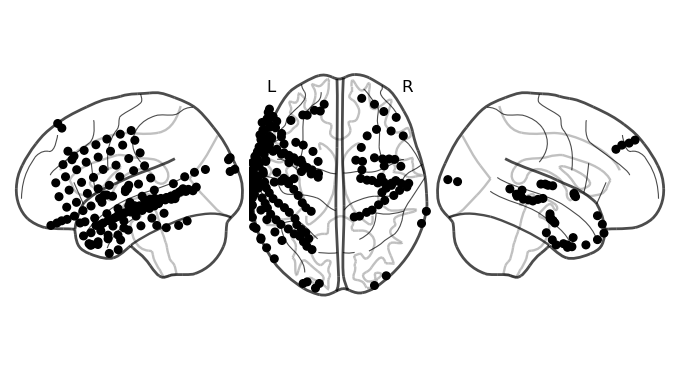

In [36]:
values = np.ones(len(coords))
plot_markers(values, coords,
             node_size=30, display_mode='lzr', alpha=1,
             node_cmap='Grays', colorbar=False, node_vmin=0, node_vmax=1)
plt.show()